In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pycbc import psd
from simple_pe.param_est import find_metric_and_eigendirections

/home/ben.patterson/.conda/envs/igwn_simple_pe/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Testing finding metric and eigendirections

In [2]:
# import logging
# _logger = logging.getLogger('PESummary')
# _logger.setLevel(logging.CRITICAL + 10)

In [2]:
# Defines PSD settings
ifos = ['H1', 'L1', 'V1']

psds = {'H1': 'aLIGOMidHighSensitivityP1200087',
        'L1': 'aLIGOMidHighSensitivityP1200087',
        'V1': 'AdVMidHighSensitivityP1200087',
        'f_low': 20,
        'f_high': 8192,
        'length': 32
        }

snr = 18

psds['delta_f'] = 1. / psds['length']

approximant = 'EccentricTD'

In [3]:
# Calculates PSD
pycbc_psd = {}
for ifo in ifos:
    pycbc_psd[ifo] = psd.analytical.from_string(psds[ifo], psds['length'] * psds['f_high'] + 1, psds['delta_f'],
                                                psds['f_low'])

pycbc_psd['harm'] = 3. / sum([1. / pycbc_psd[ifo] for ifo in ifos])

/home/ben.patterson/.conda/envs/igwn_simple_pe/lib/python3.10/site-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)


In [ ]:
# Uses simple-pe to calculate approx. of posterior dist. using metric, eigendirections
pars = {'chirp_mass':12.167, 'symmetric_mass_ratio':2/9, 'eccentricity': 0.1, 'spin_1z': 0, 'spin_2z': 0, 'f_ref':20}
par_dirs = ['chirp_mass', 'eccentricity']

g_chirp_e = find_metric_and_eigendirections(pars, par_dirs, snr=snr, f_low=psds['f_low'], psd=pycbc_psd['harm'], approximant=approximant)

2023-10-18  13:06:40 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:06:41 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:06:43 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:06:44 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:06:45 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:06:46 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-10-18  13:07:50 PESummary WARNING : Could not find f_final in input file and one was not passed

In [28]:
# Calculates 90% ellipse
chirp_e_ellipse = g_chirp_e.generate_ellipse()

In [29]:
# Calculates samples and match/pdf at each
chirp_e_mat = g_chirp_e.generate_match_grid(npts=21, scale=1.3)
chirp_e_p = np.exp(-snr**2/2 * (1 - chirp_e_mat['match']))

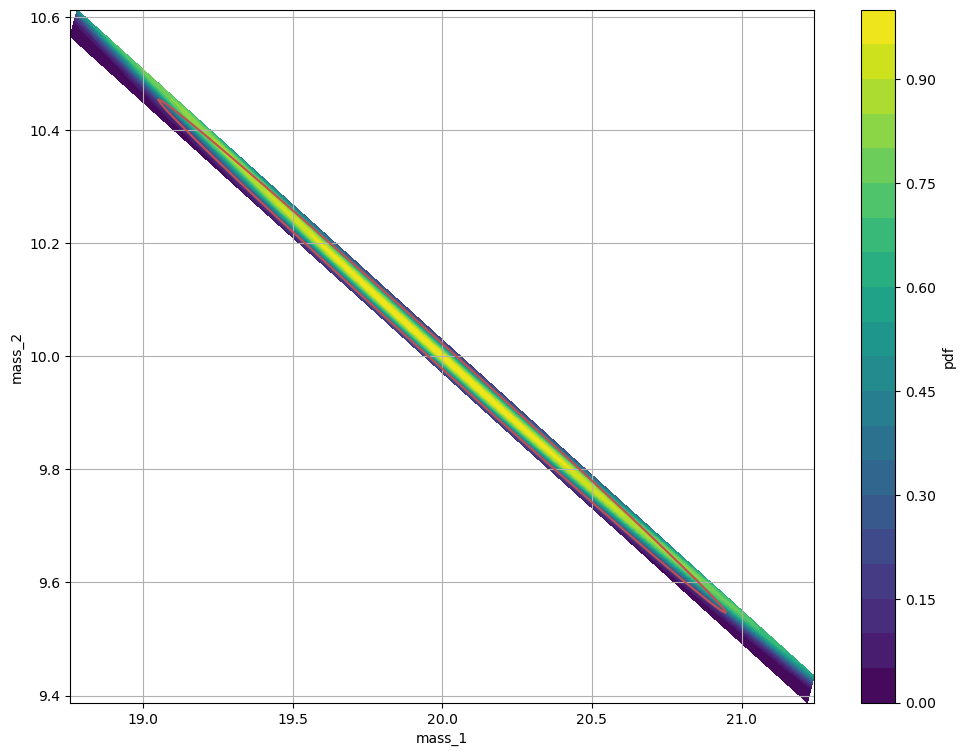

In [30]:
# Plots figure
plt.figure(figsize=(12, 9))
plt.tricontourf(chirp_e_mat.samples[0], chirp_e_mat.samples[1], chirp_e_p, levels=np.linspace(0, 1, 21))
plt.xlabel(chirp_e_mat.keys()[0])
plt.ylabel(chirp_e_mat.keys()[1])
plt.colorbar(label='pdf')
plt.plot(chirp_e_ellipse.samples[0], chirp_e_ellipse.samples[1], 'r')
plt.grid()
# plt.xlim([0,1])
# plt.ylim([0.15, 0.25])
plt.show()

# Testing TEOBResumS in simple-pe

In [1]:
from simple_pe.waveforms import waveform

In [4]:
 params = {'mass_1': 10,
          'mass_2': 20,
          'spin_1z': 0,
          'spin_2z': 0,
          'distance': 1
        }

In [33]:
delta_f = 1.0 / 32
flen = 32*4096//2 + 1
hp, hc = waveform.make_waveform(params, delta_f, 10, flen, approximant='teobresums', return_hc=True)

2024-03-07  03:33:07 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default


Unable to import EOBRun_module, please check it is installed


TypeError: cannot unpack non-iterable int object

In [29]:
hp_t = hp.to_timeseries()

(-6.0, 0.3)

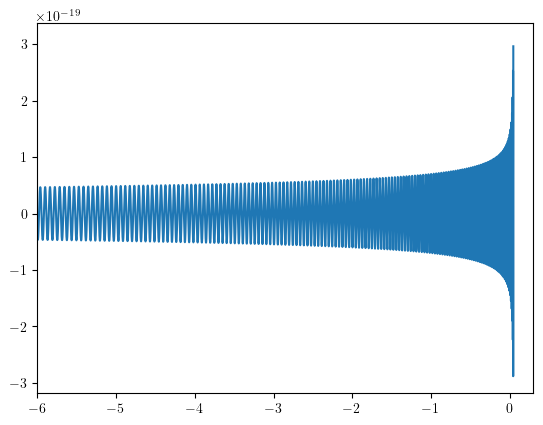

In [32]:
plt.plot(hp_t.sample_times, hp_t)
plt.xlim(-6,0.3)

/home/ben.patterson/.conda/envs/igwn_simple_pe/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


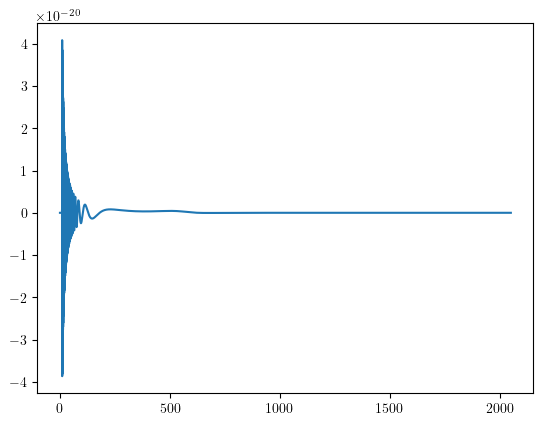

In [28]:
plt.plot(hp.sample_frequencies, hp)